In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import numpy as np

#### Đọc và xem trước

In [2]:
df = pd.read_csv('users_plus.csv')
df.head()

,user_id,username,user_url,confirm_owner,detail_name,country,user_followers,user_following,track
0,1084,2F Friendly Sessions,https://www.soundcloud.com/twofriendsfriendlys...,Yes,Two Friends,"Los Angeles, United States",32536,5,57
1,1225,99xxxx,https://www.soundcloud.com/99xxxx,Not yet,NaN,NaN,286,0,4207
2,783,radiofluxo,https://www.soundcloud.com/radiofluxo,Not yet,NaN,NaN,408,1,27569
3,257,InheritanceTracks,https://www.soundcloud.com/inheritancetracks,Not yet,NaN,NaN,39179,194,23
4,1262,604recordsmusic,https://www.soundcloud.com/604recordsmusic,Not yet,604 Records,"Vancouver, Canada",250,5,76


#### Số lượng dòng và cột

In [3]:
df.shape

(990, 9)

Như vậy dữ liệu có 990 dòng và 9 cột

- Ý nghĩa từng cột
    - username: Tên người dùng
    - user_url: Liên kết người dùng
    - confirm_owner: Xác thực thông tin
    - detail_name: Tên hiển thị
    - country: Tên quốc gia
    - user_followers: số người theo dõi 
    - user_following: số người đang theo dõi
    - track: số lượng ca khúc

#### Kiểu dữ liệu

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         990 non-null    int64 
 1   username        990 non-null    object
 2   user_url        990 non-null    object
 3   confirm_owner   990 non-null    object
 4   detail_name     517 non-null    object
 5   country         679 non-null    object
 6   user_followers  990 non-null    int64 
 7   user_following  990 non-null    int64 
 8   track           990 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 69.7+ KB


- confirm_owers: chuyển thành kiểu dữ liệu 0,1

In [5]:
dic = {'Yes' : 1, 'Not yet' : 0}
df.replace({'confirm_owner': dic}).head()

,user_id,username,user_url,confirm_owner,detail_name,country,user_followers,user_following,track
0,1084,2F Friendly Sessions,https://www.soundcloud.com/twofriendsfriendlys...,1,Two Friends,"Los Angeles, United States",32536,5,57
1,1225,99xxxx,https://www.soundcloud.com/99xxxx,0,NaN,NaN,286,0,4207
2,783,radiofluxo,https://www.soundcloud.com/radiofluxo,0,NaN,NaN,408,1,27569
3,257,InheritanceTracks,https://www.soundcloud.com/inheritancetracks,0,NaN,NaN,39179,194,23
4,1262,604recordsmusic,https://www.soundcloud.com/604recordsmusic,0,604 Records,"Vancouver, Canada",250,5,76


#### Kiểm tra trùng lắp

In [6]:
num_duplicated_rows = df.index.duplicated().sum()
print(num_duplicated_rows)

0


#### Số lượng thiếu

In [7]:
df.isnull().sum()

user_id             0
username            0
user_url            0
confirm_owner       0
detail_name       473
country           311
user_followers      0
user_following      0
track               0
dtype: int64

- Chỉ có cột detail_name với country là thiếu,vì mang kiểu str, ta sẽ sửa lại với 'Missing'

In [8]:
df = df.fillna("Missing")
df.isnull().sum()

user_id           0
username          0
user_url          0
confirm_owner     0
detail_name       0
country           0
user_followers    0
user_following    0
track             0
dtype: int64

#### Thông số từng cột

In [9]:
df.describe()

,user_id,user_followers,user_following,track
count,990.000000,9.900000e+02,990.000000,990.000000
mean,703.625253,1.433463e+05,100.308081,1542.721212
std,390.206865,4.342568e+05,300.068005,5096.519497
min,1.000000,0.000000e+00,0.000000,0.000000
25%,369.500000,7.195000e+02,0.000000,6.000000
50%,702.500000,9.531000e+03,4.000000,48.000000
75%,1034.000000,7.351900e+04,44.000000,498.500000
max,1370.000000,5.120776e+06,2005.000000,68085.000000


#### Outliers

Giả sử rằng các giá trị trong một trường dữ liệu tuân theo phân phối chuẩn, ta có thể áp dụng quy tắc $3 \sigma$ cho phân phối chuẩn.

Trong phân phối chuẩn, giả sử $\mu$ là kỳ vọng và $\sigma$ là độ lệch chuẩn.
Quy tắc $3 \sigma$ cho phân phối chuẩn nói rằng:

* 68% các điểm dữ liệu nằm trong khoảng $\mu \pm \sigma$
* 95% các điểm dữ liệu nằm trong khoảng $\mu \pm 2\sigma$
* 99.7% các điểm dữ liệu nằm trong khoảng $\mu \pm 3\sigma$

Với một điểm dữ liệu $x$, z score của nó được tính bởi:

$$
\frac{x - \mu}{\sigma}
$$

Những điểm có z score nằm ngoài đoạn $[-3, 3]$ có thể được coi là các điểm ngoại lệ. Biến đổi toán học một chút, việc này tương đương với việc các điểm nằm ngoài đoạn $[\mu - 3\sigma, \mu + 3\sigma]$ được coi là các điểm ngoại lệ.

##### Kiểm tra 3 cột mang giá trị numeric là user_followers, user_following, track

user_followers

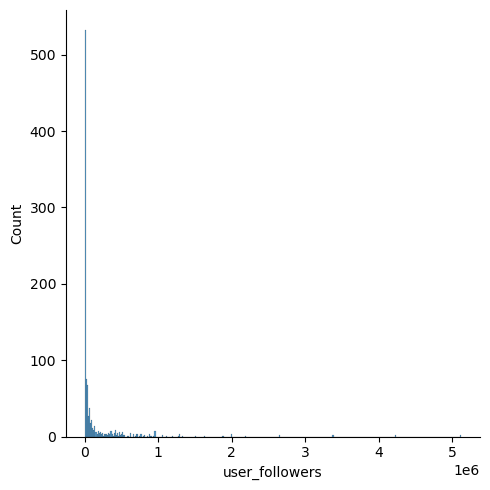

In [10]:
sns.displot(df['user_followers'])

/root/miniconda3/envs/min_ds-env/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='user_followers'>

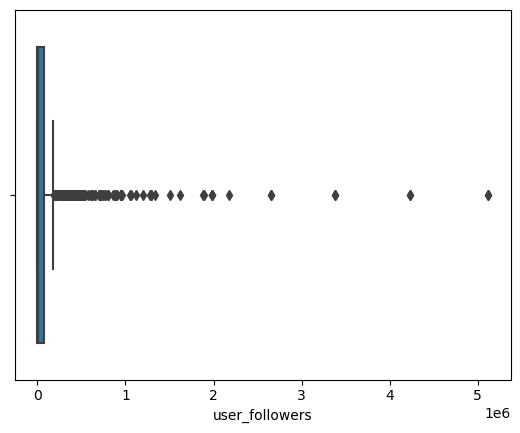

In [11]:
sns.boxplot(df['user_followers'])

In [12]:
upper_limit = df['user_followers'].mean() + 3*df['user_followers'].std()
lower_limit = df['user_followers'].mean() - 3*df['user_followers'].std()
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 1446116.7718657553
lower limit: -1159424.0769162602


In [13]:
df.loc[(df['user_followers'] > upper_limit) | (df['user_followers']< lower_limit)].head()

,user_id,username,user_url,confirm_owner,detail_name,country,user_followers,user_following,track
49,276,Okeh Records,https://www.soundcloud.com/okeh-records,Yes,Missing,"New York, United States",4228722,0,0
195,241,IAMBENGA,https://www.soundcloud.com/illuminate_music,Yes,Benga Adejumo,London,3378275,7,0
219,936,Xavier de Maistre,https://www.soundcloud.com/xavier-de-maistre,Not yet,Xavier de Maistre,"Nice, France",1985172,0,19
292,1172,50 Cent,https://www.soundcloud.com/50_cent,Yes,50 Cent,"New York City , United States",1892429,4,371
341,126,ali,https://www.soundcloud.com/alithegreatxo,Yes,Missing,Missing,2655183,0,37


In [14]:
new_df = df.loc[(df['user_followers'] <= upper_limit) & (df['user_followers'] >= lower_limit)]
print('before removing outliers:', len(df))
print('after removing outliers:',len(new_df))
print('outliers:', len(df)-len(new_df))

before removing outliers: 990
after removing outliers: 974
outliers: 16


user_following

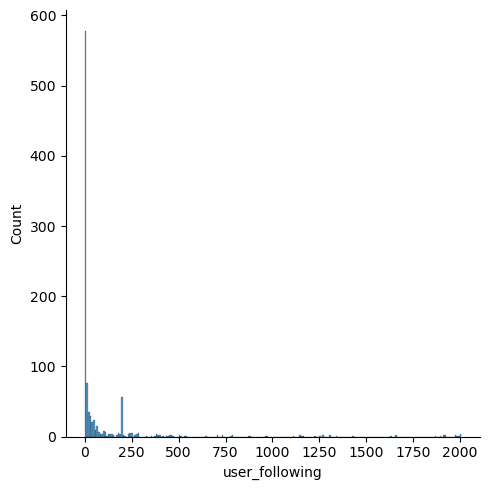

In [15]:
sns.displot(df['user_following'])

/root/miniconda3/envs/min_ds-env/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='user_following'>

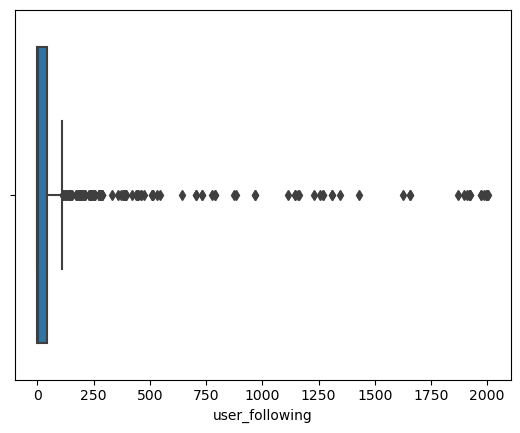

In [16]:
sns.boxplot(df['user_following'])

In [17]:
upper_limit = new_df['user_following'].mean() + 3*new_df['user_following'].std()
lower_limit = new_df['user_following'].mean() - 3*new_df['user_following'].std()
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 1008.6943402734403
lower limit: -804.8873587539331


In [18]:
new_df.loc[(new_df['user_following'] > upper_limit) | (new_df['user_following']< lower_limit)].head()

,user_id,username,user_url,confirm_owner,detail_name,country,user_followers,user_following,track
46,666,Feiyr,https://www.soundcloud.com/feiyr,Not yet,Missing,Germany,4995,1899,79
85,1176,5COTT (official),https://www.soundcloud.com/5cott,Not yet,Missing,Missing,876285,1144,8
93,102,Chill Nation,https://www.soundcloud.com/allchillnation,Yes,Missing,Worldwide,293637,1309,22
107,726,07-668,https://www.soundcloud.com/07-668,Not yet,Missing,"Hamilton FMG , New Zealand",2160,2005,15
154,190,Knowledge Is Power Promo,https://www.soundcloud.com/knowledge-is-power-...,Not yet,Jack Matthews,"oxford, United Kingdom",5202,1974,2504


In [19]:
new_df1 = new_df.loc[(new_df['user_following'] <= upper_limit) & (new_df['user_following'] >= lower_limit)]
print('before removing outliers:', len(new_df))
print('after removing outliers:',len(new_df1))
print('outliers:', len(new_df)-len(new_df1))

before removing outliers: 974
after removing outliers: 944
outliers: 30


track

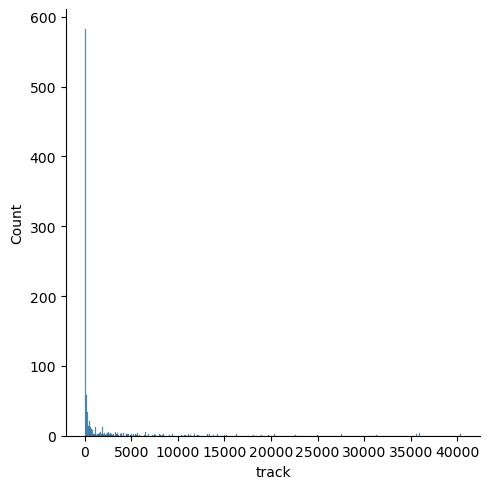

In [20]:
sns.displot(new_df1['track'])

/root/miniconda3/envs/min_ds-env/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='track'>

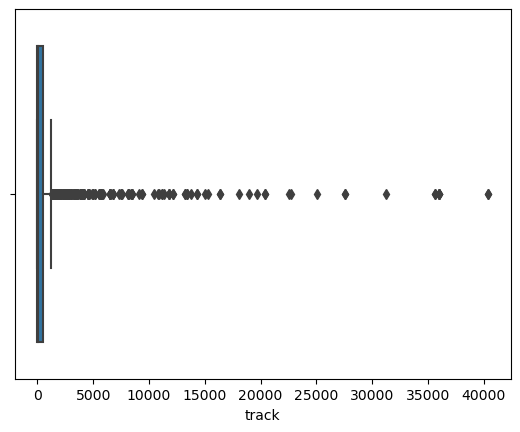

In [21]:
sns.boxplot(new_df1['track'])

In [22]:
upper_limit = new_df1['user_following'].mean() + 3*new_df1['user_following'].std()
lower_limit = new_df1['user_following'].mean() - 3*new_df1['user_following'].std()
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 425.30117193579963
lower limit: -317.6655787154606


In [23]:
new_df1.loc[(new_df1['user_following'] > upper_limit) | (new_df1['user_following']< lower_limit)].head()

,user_id,username,user_url,confirm_owner,detail_name,country,user_followers,user_following,track
31,1211,5/8 : radio,https://www.soundcloud.com/5na8radio,Not yet,Missing,Missing,3324,509,411
83,1185,50 Carrot,https://www.soundcloud.com/50carrot-dubstep,Yes,50 Carrot,"Leeds, United Kingdom",64147,775,69
90,267,InfectiousPR,https://www.soundcloud.com/infectiouspr,Not yet,Missing,"Bristol, United Kingdom",442,461,0
116,1285,6ig angu5 Selected,https://www.soundcloud.com/6ig-angu5-selected,Yes,Digital Record Label,"In Between 20 & 20,000",20747,543,9
162,1135,4B,https://www.soundcloud.com/dj4b,Yes,DJ 4B,Jersey,136028,706,107


In [24]:
new_df2 = new_df1.loc[(new_df1['user_following'] <= upper_limit) & (new_df1['user_following'] >= lower_limit)]
print('before removing outliers:', len(new_df1))
print('after removing outliers:',len(new_df2))
print('outliers:', len(new_df1)-len(new_df2))

before removing outliers: 944
after removing outliers: 920
outliers: 24


#### Visualize

Text(0.5, 1.0, 'Number of user Yes/Not Yet confirm on Soundclound')

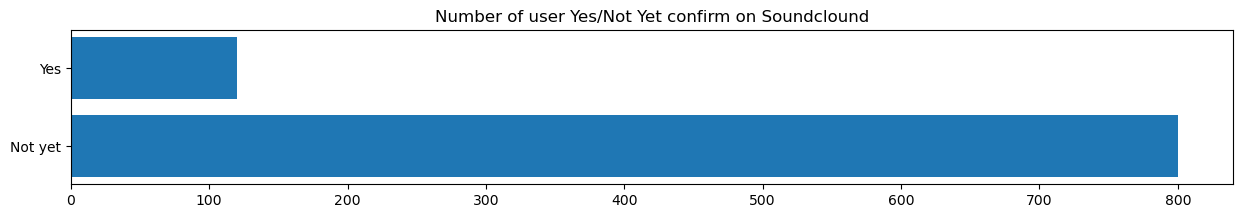

In [25]:
confirm_ower_col = new_df2['confirm_owner']
data, count = np.unique(confirm_ower_col, return_counts= True)

x_bar = data
y_bar = count
plt.figure(figsize=(15,2)) 
plt.barh(x_bar, y_bar)
plt.title("Number of user Yes/Not Yet confirm on Soundclound")

- Phần lớn người dùng không xác nhận chính chủ tài khoản của mình. Có thể là SC không quan trọng nhiều tới điều này và cho rằng điều đó không cần thiết. Cũng có thể nhiều người sợ phải lộ thông tin cá nhân của mình. Số ít tài khoản được cập nhật có thể là nghệ sĩ đã được công nhận.

##### Top 10 người có nhiều lượt theo dõi nhất

In [26]:
follower_col = new_df2[['username', 'user_followers', 'country']].sort_values(by='user_followers',ascending=False).reset_index(drop=True)
follower_col.head(10)

,username,user_followers,country
0,BLITZKIDS mvt.,1330486,Missing
1,Intelligence Squared,1295669,London
2,Intelligence Squared,1295669,London
3,Intelligence Squared,1295669,London
4,BHPublishingGroup,1274724,"Nashville, TN, United States"
5,Mysie,1119520,"London, United Kingdom"
6,Westbam,1060732,"Berlin, Germany"
7,JLS Official,1055411,"London, United Kingdom"
8,6IX9INE,955866,Missing
9,"Good Job, Brain!",954031,"San Francisco, United States"


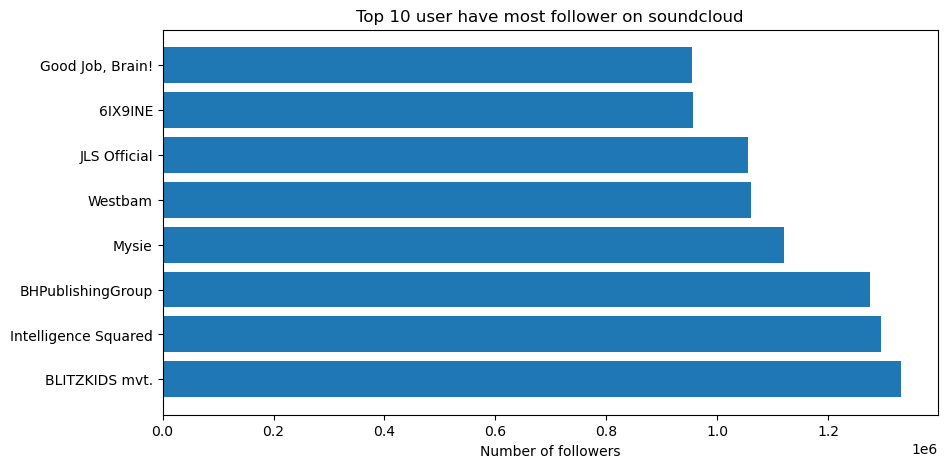

In [27]:
plt.figure(figsize=(10,5))
plt.barh(follower_col.head(10)['username'],follower_col.head(10)['user_followers'])
plt.xlabel("Number of followers")
plt.title("Top 10 user have most follower on soundcloud")
plt.show()

#### Top 10 nước có nhiều người sử dụng SC nhất:

- Vì dữ liệu của cột country đa số là theo cấu trúc (tên thành phố/ tên nước) hoặc (Tên nước). Vì vậy ta sẽ loại bỏ tên thành phố và giữ lại tên nước, sau đó sẽ cập nhật lại

Text(0.5, 1.0, 'Top 10 country have most user on soundcloud')

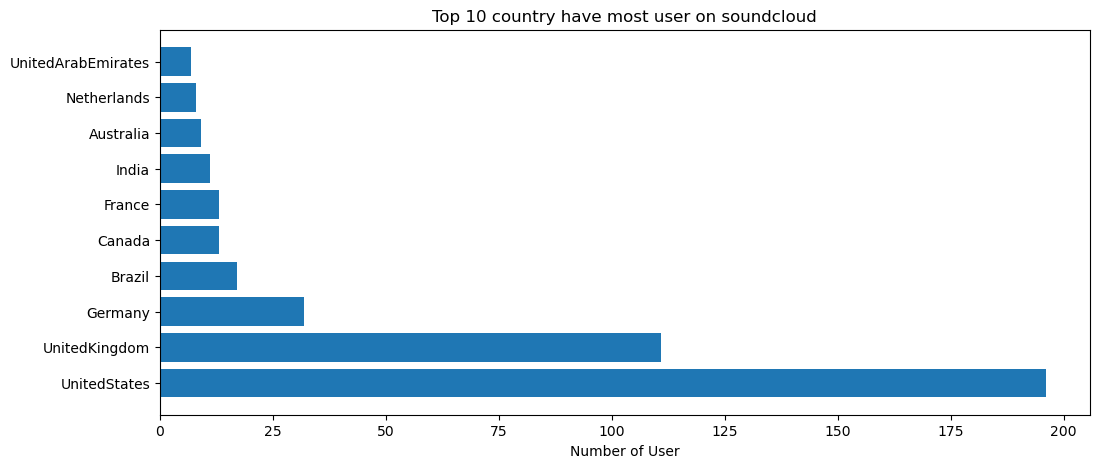

In [28]:
country = np.array(new_df2['country']).astype('str')

country = country[country != 'Missing']

def updateCountry(s):
    s = s.replace(' ', '')
    ls = s.split(',')
    if(len(ls) != 1):
        return ls[-1]
    else:
        return ls[0]

for i in range(len(country)):
    country[i] = updateCountry(country[i])
    if country[i].lower() == 'london':
        country[i] = 'UnitedKingdom'

data, count = np.unique(country, return_counts=True)
count_sort_ind = np.argsort(-count)

data = data[count_sort_ind]
count = count[count_sort_ind]

x_bar = data[0:10]
y_bar = count[0:10]
plt.figure(figsize=(12,5)) 
plt.barh(x_bar, y_bar)
plt.xlabel("Number of User")
plt.title("Top 10 country have most user on soundcloud")

#### Top 10 nước có lượng người theo dõi nhạc nhiều nhất

/tmp/ipykernel_4680/522464832.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_follower['country'][i] = updateCountry(country_follower['country'][i])


Text(0.5, 1.0, 'Top 10 country have most followers on soundcloud')

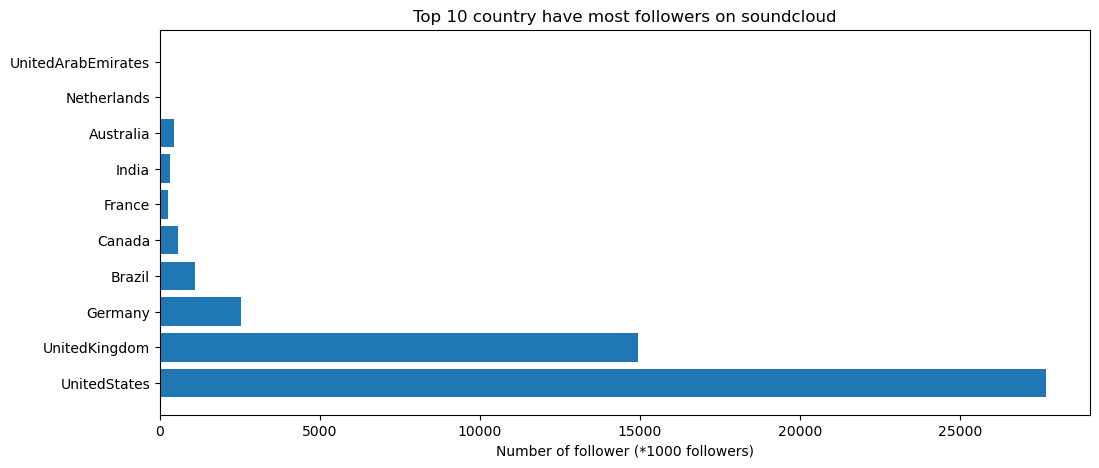

In [29]:
country_follower = new_df2[['country', 'user_followers']].reset_index(drop=True)
country_follower['user_followers'].astype('int')
country = country[country != 'Missing']
for i in range(len(country_follower)):
    country_follower['country'][i] = updateCountry(country_follower['country'][i])
 
data_country = data
data_count = np.zeros(len(data_country))
dic ={}
for A, B in zip(data_country, data_count):
    dic[A] = B

for i in range(len(country_follower)):
    if (country_follower['country'][i] in data_country):
        dic[country_follower['country'][i]] += country_follower['user_followers'][i]
sorted(dic.items(), key=lambda item: item[1],reverse=True)

result = dic.items()
data = list(result)
numpyArray = np.array(data)

top10_country = []
count = []

for i in range(10):
    top10_country.append(numpyArray[i][0])
    count.append(numpyArray[i][1].astype('float')/1000)


x_bar = top10_country
y_bar = count
plt.figure(figsize=(12,5)) 
plt.barh(x_bar, y_bar)
plt.xlabel("Number of follower (*1000 followers)")
plt.title("Top 10 country have most followers on soundcloud")

- Phần lớp người theo dõi theo dõi người dùng đến từ Mỹ, Anh, ...
- Đây cũng là những nước có số lượng người dùng SC nhiều nhất.
- Các người dùng có lượng follower cao cũng đến từ những nước này.

->Xu hướng âm nhạc hiện nay đang theo xu hướng âm nhạc của các nước như Anh, Mỹ,... Số lượng người dùng ở các nước này cao vì đây là những nước có nền công nghiệp phát triển, người dân được tiếp xúc công nghệ từ sớm.

#### Tương quan giữa user_following , user_followers, track

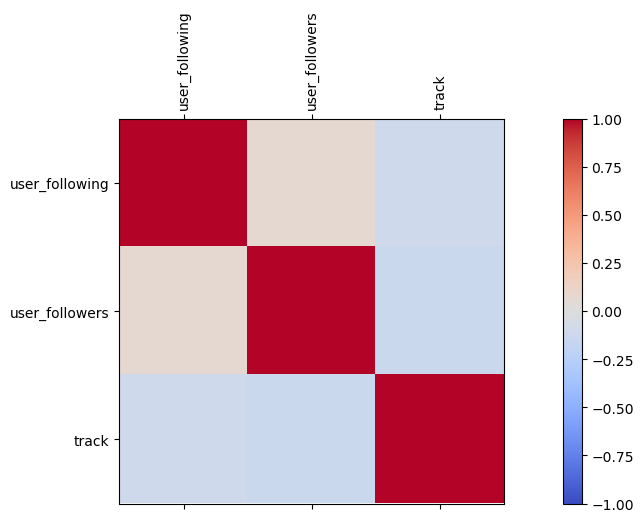

In [30]:
h = new_df2[['user_following', 'user_followers', 'track']]

corr = h.corr()
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(h.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(h.columns)
ax.set_yticklabels(h.columns)
plt.show()

- 3 thuộc tính trên có gì liên quan đến nhau hay không ?

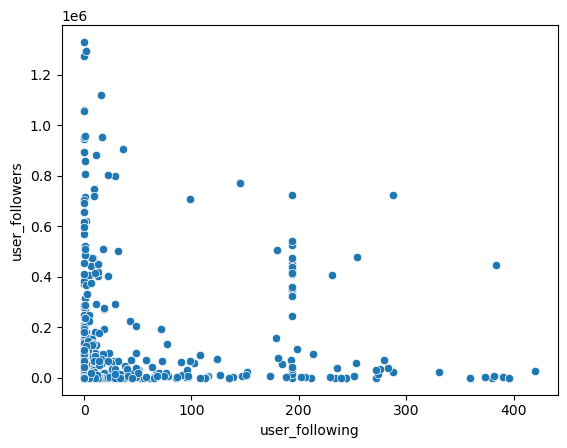

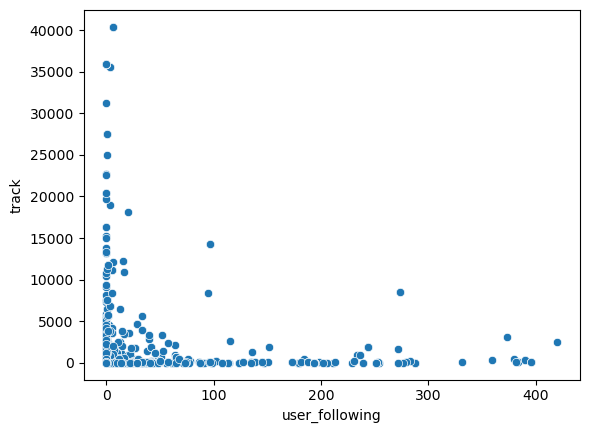

In [31]:
sns.scatterplot(data=h, x="user_following", y="user_followers")
plt.show()
sns.scatterplot(data=h, x="user_following", y="track")
plt.show()

- Có vẻ không có mối quan hệ đặc biệt nào giữa user_following và track của tài khoản ấy.
- Tương tự, giữa số lượng user_following và số lượng user_follower cũng không cung cấp thông tin đặc biệt.

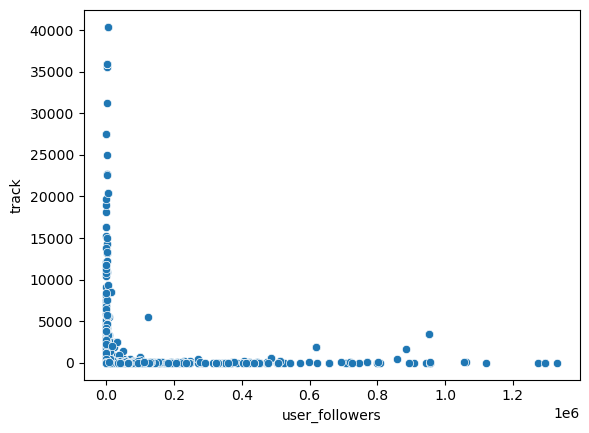

In [32]:
sns.scatterplot(data=h, x="user_followers", y="track")
plt.show()

- Chủ yếu những người có số track ít thì có số lượt theo dõi ít. Đáng chú ý là có một vài người dùng có lượng track không quá nhiều (<100 track) nhưng lại có lượt theo dõi cao, có thể các user đó là tài khoản của nghệ sĩ tự quảng bá ca khúc của họ